In [1]:
import pandas as pd 
import numpy as np
TWEET_DATA = pd.read_csv("data.csv")

TWEET_DATA.head()

,user_id,created_at,text,label
0,1.380000e+18,3/29/2021,"b""'Satgas COVID-19 mengaku kepatuhan masyaraka...",-1
1,1.380000e+18,3/29/2021,"b""'RT @ProfesorZubairi: Hari ini saya akan bah...",1
2,1.380000e+18,3/29/2021,"b""'@sshayeol agak aneh gk sih kalo alasannya k...",-1
3,1.380000e+18,3/29/2021,"b""'RT @Beritasatu: Data Kematian Covid-19 samp...",-1
4,1.380000e+18,3/29/2021,"b""'Terapkan Pendisiplinan Prokes Guna antisipa...",1


In [2]:
# ------ Case Folding --------
# gunakan fungsi Series.str.lower() pada Pandas
TWEET_DATA['text'] = [i.lower() for i in TWEET_DATA.text.astype(str)]

print('Case Folding Result : \n')
print(TWEET_DATA['text'].head(5))
print('\n\n\n')

Case Folding Result : 

0    b"'satgas covid-19 mengaku kepatuhan masyaraka...
1    b"'rt @profesorzubairi: hari ini saya akan bah...
2    b"'@sshayeol agak aneh gk sih kalo alasannya k...
3    b"'rt @beritasatu: data kematian covid-19 samp...
4    b"'terapkan pendisiplinan prokes guna antisipa...
Name: text, dtype: object






In [3]:
import string 
import re #regex library

# import word_tokenize & FreqDist from NLTK
from nltk.tokenize import word_tokenize 
from nltk.probability import FreqDist

# ------ Tokenizing ---------

def remove_tweet_special(text):
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    # remove incomplete URL
    return text.replace("http://", " ").replace("https://", " ")
                
TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_tweet_special)

#remove number
def remove_number(text):
    return  re.sub(r"\d+", "", text)

TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_number)

#remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("","",string.punctuation))

TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_punctuation)

#remove whitespace leading & trailing
def remove_whitespace_LT(text):
    return text.strip()

TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_whitespace_LT)

#remove multiple whitespace into single whitespace
def remove_whitespace_multiple(text):
    return re.sub('\s+',' ',text)

TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_whitespace_multiple)

# remove single char
def remove_singl_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

TWEET_DATA['text'] = TWEET_DATA['text'].apply(remove_singl_char)

# NLTK word rokenize 
def word_tokenize_wrapper(text):
    return word_tokenize(text)

TWEET_DATA['tweet_tokens'] = TWEET_DATA['text'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n') 
print(TWEET_DATA['tweet_tokens'].head())
print('\n\n\n')

Tokenizing Result : 

0    [bsatgas, covid, mengaku, kepatuhan, masyaraka...
1    [brt, hari, ini, saya, akan, bahas, soal, long...
2       [agak, aneh, gk, sih, kalo, alasannya, korona]
3          [brt, data, kematian, covid, sampai, maret]
4    [bterapkan, pendisiplinan, prokes, guna, antis...
Name: tweet_tokens, dtype: object






In [4]:
# NLTK calc frequency distribution
def freqDist_wrapper(text):
    return FreqDist(text)

TWEET_DATA['tweet_tokens_fdist'] = TWEET_DATA['tweet_tokens'].apply(freqDist_wrapper)

print('Frequency Tokens : \n') 
print(TWEET_DATA['tweet_tokens_fdist'].head().apply(lambda x : x.most_common()))

Frequency Tokens : 

0    [(bsatgas, 1), (covid, 1), (mengaku, 1), (kepa...
1    [(brt, 1), (hari, 1), (ini, 1), (saya, 1), (ak...
2    [(agak, 1), (aneh, 1), (gk, 1), (sih, 1), (kal...
3    [(brt, 1), (data, 1), (kematian, 1), (covid, 1...
4    [(bterapkan, 1), (pendisiplinan, 1), (prokes, ...
Name: tweet_tokens_fdist, dtype: object


In [5]:
from nltk.corpus import stopwords

# ----------------------- get stopword from NLTK stopword -------------------------------
# get stopword indonesia
list_stopwords = stopwords.words('indonesian')


# ---------------------------- manualy add stopword  ------------------------------------
# append additional stopword
list_stopwords.extend(["yg", "dg", "brt", "dgn", 'klo', 
                       'kalo', 'amp', 'biar', 'bikin', 'bilang', 
                       'gak', 'gk', 'krn', 'nih', 'sih', 'xexxa','bxfxxc','lo','aku','sy'
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'saya','aku','bsaya'
                       'jd', 'jgn', 'sdh', 'aja', 'nyg', 'hehe', 'pen', 'nan', 'loh', 'rt',
                       '&amp', 'yah','of','guys','dri','ku','kmu'])

# ----------------------- add stopword from txt file ------------------------------------
# read txt stopword using pandas
#txt_stopword = pd.read_csv("stopwords.txt", names= ["stopwords"], header = None)

# convert stopword string to list & append additional stopword
#list_stopwords.extend(txt_stopword["stopwords"][0].split(' '))

# ---------------------------------------------------------------------------------------

# convert list to dictionary
list_stopwords = set(list_stopwords)


#remove stopword pada list token
def stopwords_removal(words):
    return [word for word in words if word not in list_stopwords]

TWEET_DATA['tweet_tokens_WSW'] = TWEET_DATA['tweet_tokens'].apply(stopwords_removal) 

print(TWEET_DATA['tweet_tokens_WSW'].head())

0    [bsatgas, covid, mengaku, kepatuhan, masyaraka...
1    [bahas, long, covid, sebutannya, diganti, post...
2                            [aneh, alasannya, korona]
3                       [data, kematian, covid, maret]
4    [bterapkan, pendisiplinan, prokes, antisipasi,...
Name: tweet_tokens_WSW, dtype: object


In [6]:
print(TWEET_DATA.head())

        user_id created_at                                               text  \
0  1.380000e+18  3/29/2021  bsatgas covid mengaku kepatuhan masyarakat ter...   
1  1.380000e+18  3/29/2021  brt hari ini saya akan bahas soal long covid y...   
2  1.380000e+18  3/29/2021             agak aneh gk sih kalo alasannya korona   
3  1.380000e+18  3/29/2021               brt data kematian covid sampai maret   
4  1.380000e+18  3/29/2021  bterapkan pendisiplinan prokes guna antisipasi...   

   label                                       tweet_tokens  \
0     -1  [bsatgas, covid, mengaku, kepatuhan, masyaraka...   
1      1  [brt, hari, ini, saya, akan, bahas, soal, long...   
2     -1     [agak, aneh, gk, sih, kalo, alasannya, korona]   
3     -1        [brt, data, kematian, covid, sampai, maret]   
4      1  [bterapkan, pendisiplinan, prokes, guna, antis...   

                                  tweet_tokens_fdist  \
0  {'bsatgas': 1, 'covid': 1, 'mengaku': 1, 'kepa...   
1  {'brt': 1, 'hari': 

In [7]:
normalizad_word = pd.read_excel("normalisasi.xlsx")

normalizad_word_dict = {}

for index, row in normalizad_word.iterrows():
    if row[0] not in normalizad_word_dict:
        normalizad_word_dict[row[0]] = row[1] 

def normalized_term(document):
    return [normalizad_word_dict[term] if term in normalizad_word_dict else term for term in document]

TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)
TWEET_DATA['tweet_normalized'] = TWEET_DATA['tweet_tokens_WSW'].apply(normalized_term)

TWEET_DATA['tweet_normalized'].head(10)

0    [satgas, covid, mengaku, kepatuhan, masyarakat...
1    [bahas, long, covid, sebutannya, diganti, post...
2                            [aneh, alasannya, korona]
3                       [data, kematian, covid, maret]
4    [terapkan, pendisiplinan, prokes, antisipasi, ...
5    [perdana, menteri, tan, sri, muhyiddin, yassin...
6             [dosen, usu, meninggal, terpapar, covid]
7    [kumulatif, konfirmasi, positif, covid, indone...
8    [secara, bertahap, program, vaksinasi, pegawai...
9    [yaudahlah, poto, gapapa, pake, alesan, korona...
Name: tweet_normalized, dtype: object

In [8]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import swifter


# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# stemmed
def stemmed_wrapper(term):
    return stemmer.stem(term)

term_dict = {}

for document in TWEET_DATA['tweet_normalized']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '
            
print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmed_wrapper(term)
    print(term,":" ,term_dict[term])
    
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

TWEET_DATA['tweet_tokens_stemmed'] = TWEET_DATA['tweet_normalized'].swifter.apply(get_stemmed_term)
print()

1322
------------------------
satgas : satgas
covid : covid
mengaku : aku
kepatuhan : patuh
masyarakat : masyarakat
protokol : protokol
kesehatan : sehat
menurun : turun
dilaksanakannya : laksana
vaksin : vaksin
bahas : bahas
long : long
sebutannya : sebut
diganti : ganti
post : post
acute : acute
sequelae : sequelae
sarscov : sarscov
pascxexxa : pascxexxa
aneh : aneh
alasannya : alas
korona : korona
data : data
kematian : mati
maret : maret
terapkan : terap
pendisiplinan : disiplin
prokes : prokes
antisipasi : antisipasi
personil : personil
sat : sat
polair : polair
polres : polres
jembrana : jembrana
lakukan : laku
kurve : kurve
kebersihan : bersih
perdana : perdana
menteri : menteri
tan : tan
sri : sri
muhyiddin : muhyiddin
yassin : yassin
jaminan : jamin
kerajaan : raja
berusaha : usaha
membantu : bantu
memulihkan : pulih
kehidupan : hidup
rakyaxexxa : rakyaxexxa
dosen : dosen
usu : usu
meninggal : tinggal
terpapar : papar
kumulatif : kumulatif
konfirmasi : konfirmasi
positif : pos

bbalik : bbalik
tambooonnn : tambooonnn
wohooo : wohooo
hooo : hooo
tamboooonnnn : tamboooonnnn
hati : hati
giranggggggggggggg : giranggggggggggggg
bdih : bdih
anjing : anjing
gblokkkk : gblokkkk
mengambil : ambil
comirnaty : comirnaty
terbaik : baik
wanita : wanita
kandungan : kandung
bexexxa : bexexxa
bbiasakan : bbiasakan
pakai : pakai
masker : masker
mari : mari
si : si
riski : riski
kk : kk
penduduk : duduk
komplek : komplek
hri : hri
dtg : dtg
ombir : ombir
dll : dll
jarang : jarang
nampak : nampak
dibilang : bilang
goixexxa : goixexxa
cluster : cluster
takziah : takziah
ngeeeeeng : ngeeeeeng
ntar : ntar
yasinan : yasinan
tujuh : tujuh
pendak : pendak
semacamnya : macam
jokowi : jokowi
larang : larang
anies : anies
dki : dki
aturan : atur
menxexxa : menxexxa
bsalah : bsalah
perjuangan : juang
berumur : umur
munculnya : muncul
solidaritas : solidaritas
mendukung : dukung
berjuaxexxa : berjuaxexxa
mendaftar : daftar
tanggungan : tanggung
aplikasi : aplikasi
mysejahtera : mysejahter

kuwait : kuwait
bahraxexxa : bahraxexxa
avp : avp
penyiapan : siap
dannhand : dannhand
sanitizer : sanitizer
pertamina : pertamina
pengungsian : ungsi
tidxexxa : tidxexxa
bdukung : bdukung
tersayang : sayang
ale : ale
handanovic : handanovic
negatif : negatif
xfxfxex : xfxfxex
bsenin : bsenin
penambahan : tambah
ingatkan : ingat
subjekxexxa : subjekxexxa
ditambah : tambah
read : read
more : more
bpertumbuhan : bpertumbuhan
perlengkapan : lengkap
ketinggalan : tinggal
disiapkan : siap
selengkapnya : lengkap
infografis : infografis
percepatan : cepat
wib : wib
bulk : bulk
overfill : overfill
kedatangan : datang
merupakxexxa : merupakxexxa
btak : btak
tb : tb
dicegah : cegah
cari : cari
info : info
ulama : ulama
gakxexxa : gakxexxa
bdisaat : bdisaat
sulit : sulit
industri : industri
rumah : rumah
tangga : tangga
dixexxa : dixexxa
kemarin : kemarin
dosis : dosis
disuntikkan : suntik
rincian : rincian
bpengalamannya : bpengalamannya
menggelar : gelar
uji : uji
coba : coba
ptm : ptm
smk : sm

In [9]:
TWEET_DATA.to_csv("new_data.csv")

In [10]:
new_data=pd.read_csv('new_data.csv')

In [11]:
x=new_data['tweet_tokens_stemmed']
y=new_data['label']

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer()
data_vektor = vectorizer.fit_transform(x)
lda = LatentDirichletAllocation(n_components = 7, random_state = 42)
lda.fit(data_vektor)

LatentDirichletAllocation(n_components=7, random_state=42)

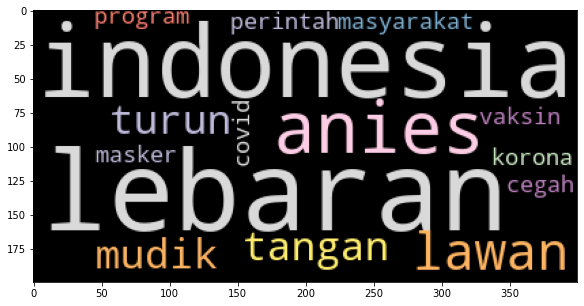

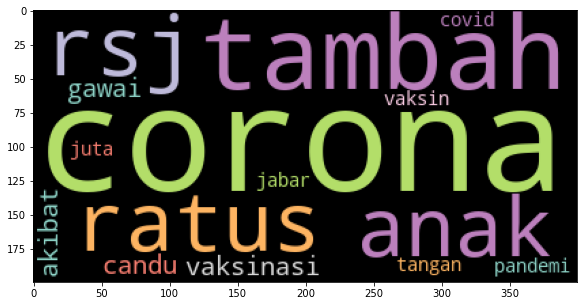

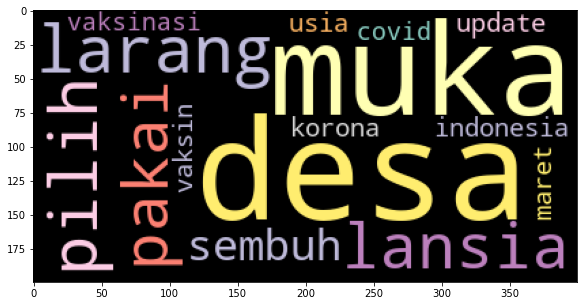

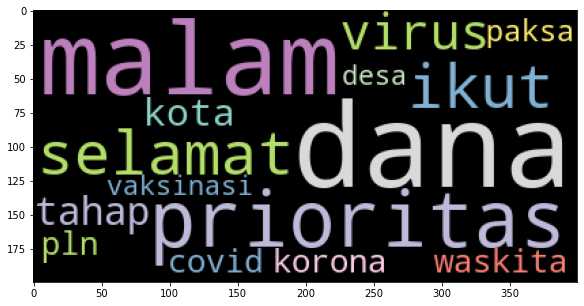

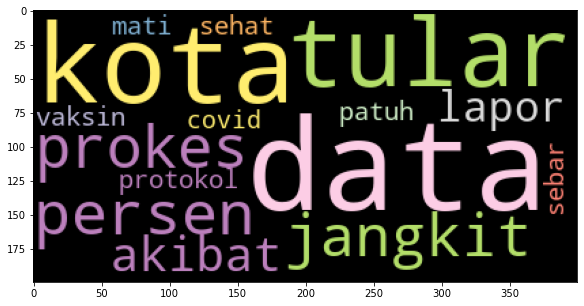

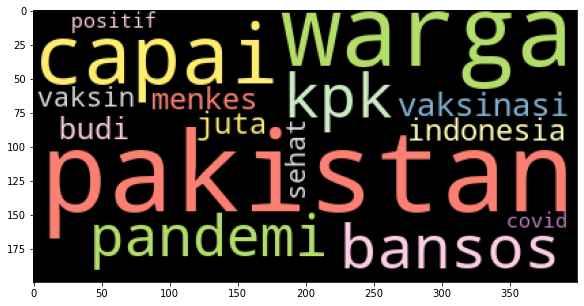

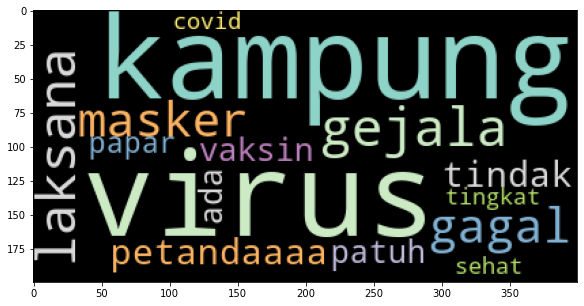

In [13]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
for index, topic in enumerate(lda.components_):
  tmps = [vectorizer.get_feature_names()[i] for i in topic.argsort()[-15:]]
  text = " ".join(str(topik) for topik in tmps)
  wordcloud = WordCloud(max_words=50,colormap='Set3', background_color="black").generate(text)
  plt.figure(figsize=(10,5))
  plt.imshow(wordcloud)
  plt.show()